## Importing essential libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Uploading

In [144]:
df = pd.read_csv('/content/drive/MyDrive/Internship/Week4_Assignment/tested.csv')

df.shape

(418, 12)

In [145]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Dataset Cleaning and filtering

In [147]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [148]:
# As we can see more than half of data in Cabin column is null, so we will drop it.
df.drop(columns = ['Cabin'],inplace = True)

# We will fill null value in Age column
df['Age'].fillna(df['Age'].mean(),inplace = True)

# Filled the fare with mode
df['Fare'].fillna(df['Fare'].mode()[0],inplace = True)

/tmp/ipython-input-2187198634.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)
/tmp/ipython-input-2187198634.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [149]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Data Manipulation

In [156]:
# converting Gender to numerical
df['Sex'] = df['Sex'].map({'male':0,'female':1})

# converting Embarked to numerical
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

## Data Visualization

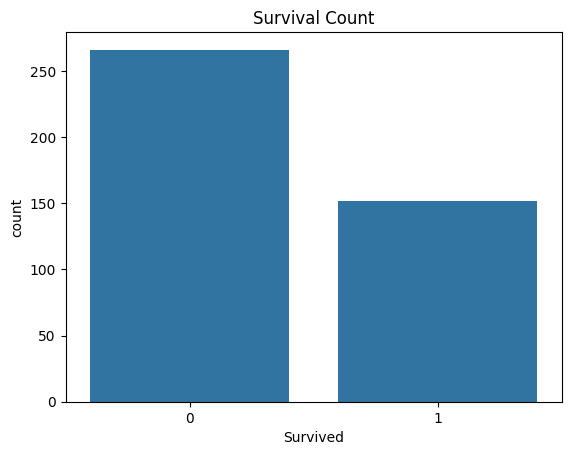

In [150]:
sns.countplot(x='Survived',data = df) # Actual Survivers
plt.title('Survival Count')
plt.show()

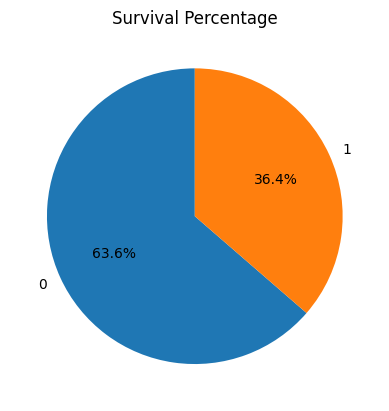

In [151]:
df['Survived'].value_counts().plot(
    kind = 'pie',
    autopct = '%0.01f%%',
    startangle=90
)
plt.title('Survival Percentage')
plt.ylabel("")
plt.show()

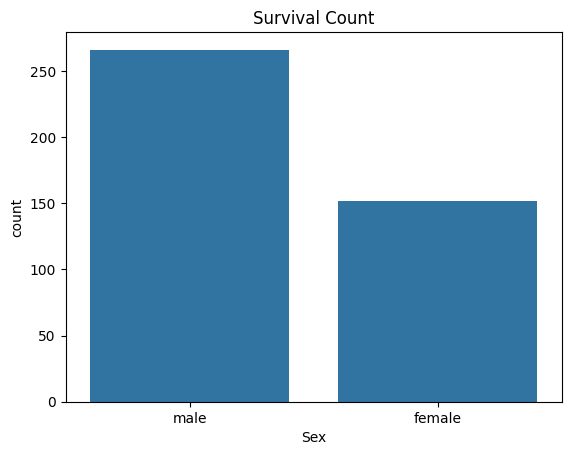

In [152]:
sns.countplot(x='Sex',data = df) # Survival by Gender
plt.title('Survival Count')
plt.show()

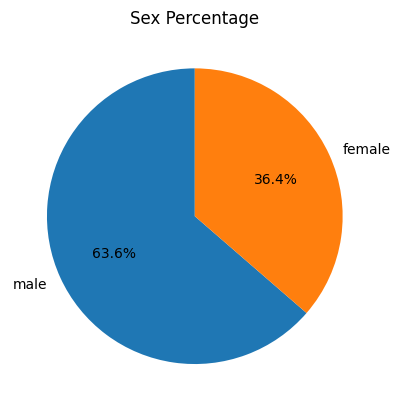

In [153]:
df['Sex'].value_counts().plot(
    kind = 'pie',
    autopct = '%0.01f%%',
    startangle=90
)
plt.title('Sex Percentage')
plt.ylabel("")
plt.show()

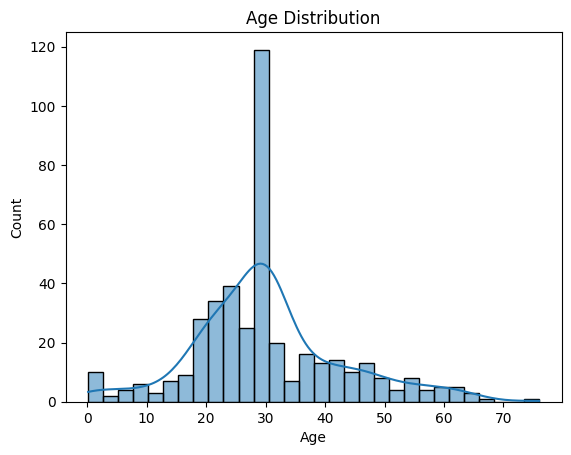

In [154]:
sns.histplot(x = 'Age', data = df,bins = 30,kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

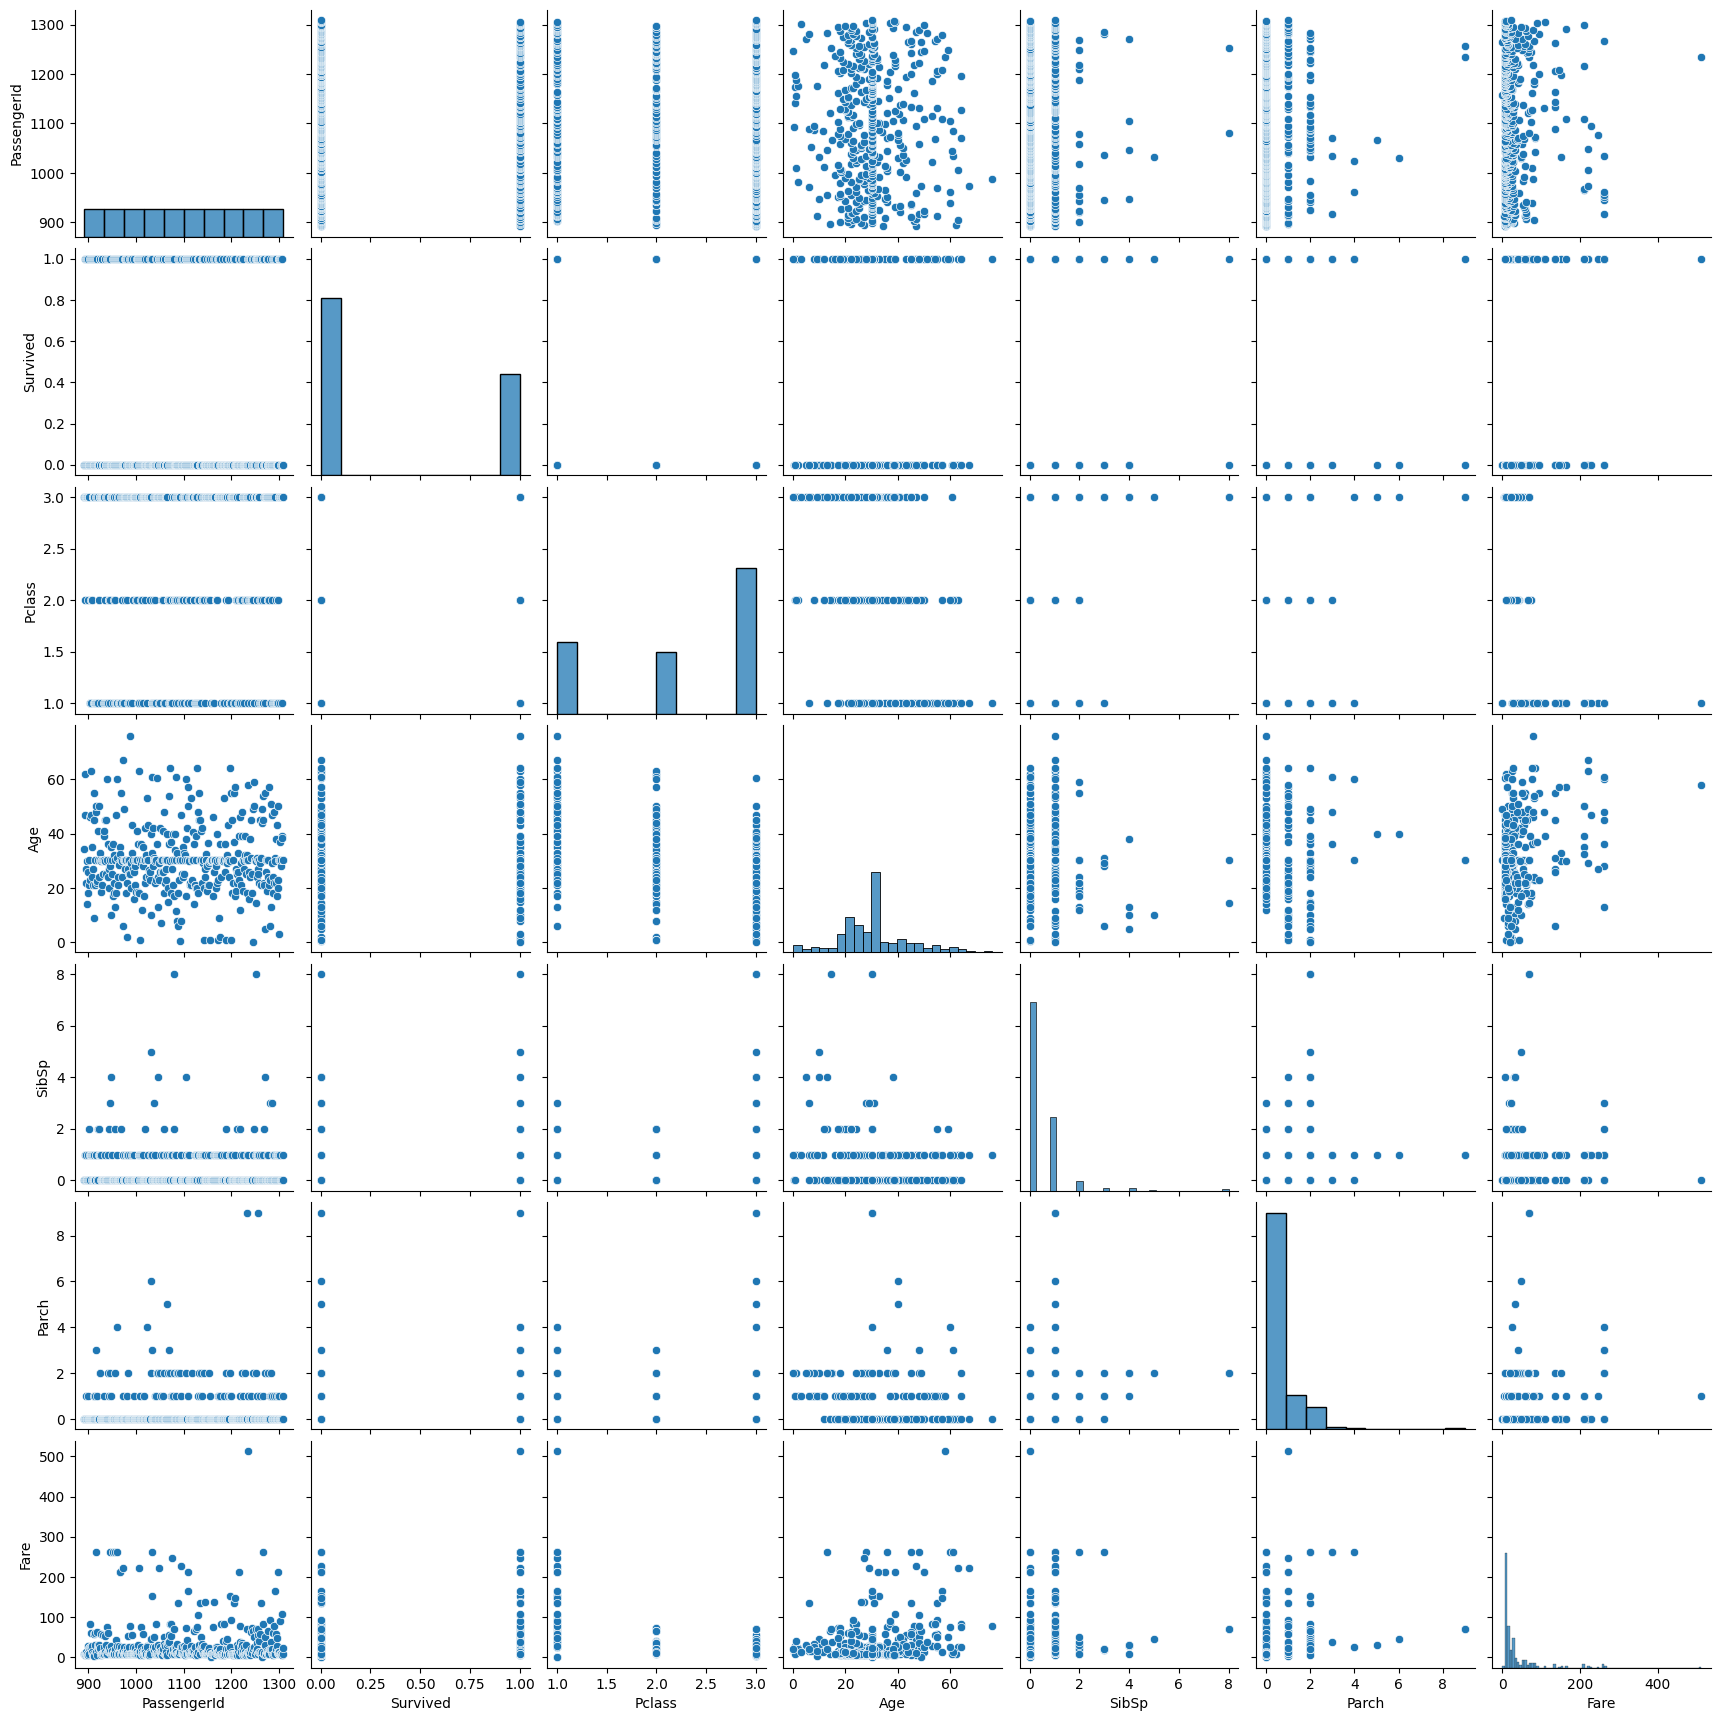

In [155]:
sns.pairplot(df)
plt.show()

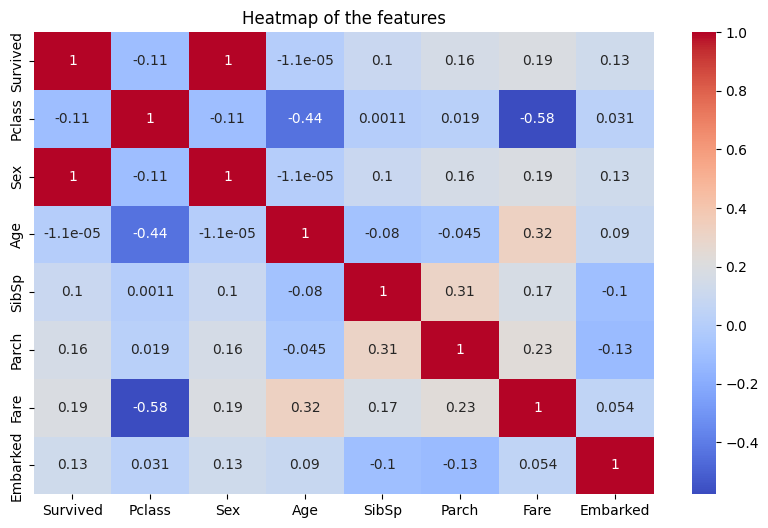

In [157]:
df.drop(columns = ['Name','Ticket','PassengerId'],inplace =True) # for better heatmapping of the important features

plt.figure(figsize =(10,6))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')
plt.title('Heatmap of the features')
plt.show()

## Feature Engineering

In [158]:
# FamilySize feature:
df['FamilySize']  =  df['Parch'] + df['SibSp'] + 1

In [159]:
df['IsAlone'] = np.where(df['FamilySize'] == 1,1,0)

In [160]:
df['FamilySize']

,FamilySize
0,1
1,2
2,1
3,1
4,3
...,...
413,1
414,1
415,1
416,1


In [161]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,0,34.5,0,0,7.8292,2,1,1
1,1,3,1,47.0,1,0,7.0000,0,2,0
2,0,2,0,62.0,0,0,9.6875,2,1,1
3,0,3,0,27.0,0,0,8.6625,0,1,1
4,1,3,1,22.0,1,1,12.2875,0,3,0


## Saving the cleaned csv

In [162]:
df.to_csv('Cleaned_tested.csv',index = False)